In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## get the full path name of the train_images and test_images 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

/kaggle/input/autistic-children-data-set-traintestvalidate/autism-S-224-89.33.h5
/kaggle/input/autistic-children-data-set-traintestvalidate/consolidated/autistic/0664.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/consolidated/non_autistic/0664.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/valid/autistic/45.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/valid/non_autistic/45.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/test/autistic/029.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/test/non_autistic/029.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/train/autistic/0664.jpg
/kaggle/input/autistic-children-data-set-traintestvalidate/train/non_autistic/0664.jpg


In [3]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import skimage
from skimage.io import imread
from skimage.transform import resize

In [4]:
import tensorflow as tf

In [3]:
def load_image_files(container_path, dimension=(224, 224)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            
            img = skimage.io.imread(file) ## need to add in plugin for reading png images.
            #img = img[:,:,:3]
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            #flat_data.append(img_resized.flatten()) 
            flat_data.append(img_resized)
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [4]:
train_data = load_image_files("/kaggle/input/autistic-children-data-set-traintestvalidate/train")

In [ ]:
len(train_data['images'])

In [ ]:
train_data['target_names']

In [ ]:
train_data['images'][0].shape

In [ ]:
plt.figure()
plt.imshow(train_data['images'][0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
## read in validation  data 
valid_data = load_image_files("/kaggle/input/autistic-children-data-set-traintestvalidate/valid")

In [6]:
## read in test data 
test_data = load_image_files("/kaggle/input/autistic-children-data-set-traintestvalidate/test")

In [ ]:
len(valid_data['images'])

In [ ]:
len(test_data['images'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
train_data.keys()

In [ ]:
train_data['target'].shape

In [ ]:
## With single layer , 128 neurons and callback.

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224,3)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid), callbacks = [callbacks])
##
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
## With single layer , 256 neurons and callback.

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224,3)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid), callbacks = [callbacks])
##
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
## With single layer , 128 neurons and callback.

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224,3)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid), callbacks = [callbacks])
##
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Epoch 1/10
80/80 [==============================] - 119s 1s/step - loss: 11.4279 - accuracy: 0.5259 - val_loss: 0.5513 - val_accuracy: 0.7200
Epoch 2/10
80/80 [==============================] - 93s 1s/step - loss: 0.5614 - accuracy: 0.7082 - val_loss: 0.4862 - val_accuracy: 0.7400
Epoch 3/10
80/80 [==============================] - 94s 1s/step - loss: 0.3779 - accuracy: 0.8355 - val_loss: 0.4509 - val_accuracy: 0.7800
Epoch 4/10
80/80 [==============================] - 94s 1s/step - loss: 0.2309 - accuracy: 0.9264 - val_loss: 0.6161 - val_accuracy: 0.7100
Epoch 5/10
80/80 [==============================] - 94s 1s/step - loss: 0.1125 - accuracy: 0.9736 - val_loss: 0.5850 - val_accuracy: 0.7600
Epoch 6/10
80/80 [==============================] - 96s 1s/step - loss: 0.0487 - accuracy: 0.9920 - val_loss: 0.7002 - val_accuracy: 0.7300
Epoch 7/10
80/80 [==============================] - 104s 1s/step - loss: 0.0228 - accuracy: 0.9987 - val_loss: 0.8201 - val_accuracy: 0.7200
Epoch 8/10
80/80 

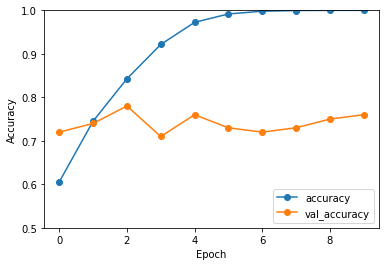

In [7]:
##  With convolution layer 

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid))
##
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
def get_labels(prob_model, images):
    predictions = prob_model.predict(images)

    ## based on the max value of probability , predict the class.
    predicted_labels = []
    for i in range(len(predictions)):
        pred_label = np.argmax(predictions[i])
        predicted_labels.append(pred_label)
    return predicted_labels


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

test_predicted_labels = get_labels(probability_model, X_test)


In [13]:
print("Classification report :\n{}\n".format(
     classification_report(y_test, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.78      0.77      0.77       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300




Epoch 1/10
80/80 [==============================] - 155s 2s/step - loss: 1.7005 - accuracy: 0.5886 - val_loss: 0.5561 - val_accuracy: 0.7100
Epoch 2/10
80/80 [==============================] - 144s 2s/step - loss: 0.5766 - accuracy: 0.7261 - val_loss: 0.6269 - val_accuracy: 0.7200
Epoch 3/10
80/80 [==============================] - 144s 2s/step - loss: 0.4303 - accuracy: 0.8059 - val_loss: 0.5746 - val_accuracy: 0.7400
Epoch 4/10
80/80 [==============================] - 145s 2s/step - loss: 0.2899 - accuracy: 0.8877 - val_loss: 0.8325 - val_accuracy: 0.6900
Epoch 5/10
80/80 [==============================] - 145s 2s/step - loss: 0.1647 - accuracy: 0.9433 - val_loss: 1.0642 - val_accuracy: 0.7100
Epoch 6/10
80/80 [==============================] - 145s 2s/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 1.4646 - val_accuracy: 0.6500
Epoch 7/10
80/80 [==============================] - 146s 2s/step - loss: 0.0223 - accuracy: 0.9954 - val_loss: 1.7463 - val_accuracy: 0.6800
Epoch 8/10
80

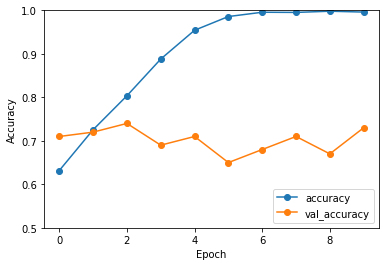

In [14]:
##  With 2 convolution layers 

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid))
##
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

test_predicted_labels = get_labels(probability_model, X_test)

In [17]:
print("Classification report :\n{}\n".format(
     classification_report(y_test, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       150
           1       0.81      0.65      0.72       150

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.74       300
weighted avg       0.76      0.75      0.74       300




Decrease in accuracy with 2 convolution layers.  

Epoch 1/20
80/80 [==============================] - 163s 2s/step - loss: 0.9486 - accuracy: 0.5103 - val_loss: 0.5872 - val_accuracy: 0.6500
Epoch 2/20
80/80 [==============================] - 156s 2s/step - loss: 0.6067 - accuracy: 0.6739 - val_loss: 0.6400 - val_accuracy: 0.7000
Epoch 3/20
80/80 [==============================] - 157s 2s/step - loss: 0.5508 - accuracy: 0.7148 - val_loss: 0.5210 - val_accuracy: 0.7100
Epoch 4/20
80/80 [==============================] - 157s 2s/step - loss: 0.5229 - accuracy: 0.7547 - val_loss: 0.5463 - val_accuracy: 0.7200
Epoch 5/20
80/80 [==============================] - 158s 2s/step - loss: 0.4671 - accuracy: 0.7807 - val_loss: 0.5557 - val_accuracy: 0.7400
Epoch 6/20
80/80 [==============================] - 157s 2s/step - loss: 0.4258 - accuracy: 0.8065 - val_loss: 0.5314 - val_accuracy: 0.7500
Epoch 7/20
80/80 [==============================] - 160s 2s/step - loss: 0.3440 - accuracy: 0.8545 - val_loss: 0.5068 - val_accuracy: 0.7600
Epoch 8/20
80

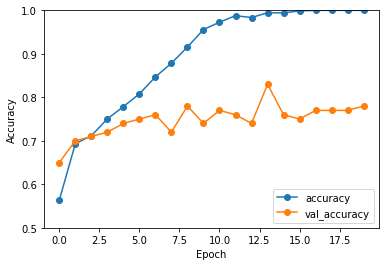

In [18]:
# 3 layers of convolution and pooling.
##  
X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid,y_valid))
##
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

test_predicted_labels = get_labels(probability_model, X_test)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

test_predicted_labels = get_labels(probability_model, X_test)

In [21]:
print("Classification report :\n{}\n".format(
     classification_report(y_test, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.76      0.74      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300




No improvement in accuracy with 3 convolution layers.  

In [ ]:
##  For  the best model of the three above, change the learning rate and check performance
##  

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

for lr in [0.0001, 0.001, 0.01]:
     

    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])

    optim = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
    history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid))
    ##
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("Test image accuracy :{}".format(test_acc))
    ##
    plt.figure()
    plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
    plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.title("Learning  rate : " + str(lr))

Epoch 1/10
80/80 [==============================] - 11s 75ms/step - loss: 2.3611 - accuracy: 0.5461 - val_loss: 1.2006 - val_accuracy: 0.5400
Epoch 2/10
80/80 [==============================] - 5s 63ms/step - loss: 0.7452 - accuracy: 0.6731 - val_loss: 0.9808 - val_accuracy: 0.5900
Epoch 3/10
80/80 [==============================] - 5s 65ms/step - loss: 0.5629 - accuracy: 0.7316 - val_loss: 0.9010 - val_accuracy: 0.6900
Epoch 4/10
80/80 [==============================] - 5s 65ms/step - loss: 0.3903 - accuracy: 0.8217 - val_loss: 0.4774 - val_accuracy: 0.7500
Epoch 5/10
80/80 [==============================] - 5s 64ms/step - loss: 0.3142 - accuracy: 0.8760 - val_loss: 0.4903 - val_accuracy: 0.7500
Epoch 6/10
80/80 [==============================] - 5s 64ms/step - loss: 0.2732 - accuracy: 0.8885 - val_loss: 0.4861 - val_accuracy: 0.7700
Epoch 7/10
80/80 [==============================] - 5s 65ms/step - loss: 0.1955 - accuracy: 0.9485 - val_loss: 0.5423 - val_accuracy: 0.7500
Epoch 8/10
8

Due to Kaggle RAM limitations, the run of the code above couldn't be completed.  

In [ ]:
## Adding dropout layer for regularization to the best model of the three 
##  

X_train = train_data['data']
X_valid = valid_data['data']
X_test = test_data['data']
##
y_train = train_data['target']
y_test = test_data['target']
y_valid = valid_data['target']

for d in [0.15,0.35,0.45]:
    
    

    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
        tf.keras.layers.Dropout(d),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
    history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid,y_valid))
    ##
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("Test image accuracy :{}".format(test_acc))
    ##
    plt.figure()
    plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
    plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.title("Dropout rate : " + str(d))

Epoch 1/10
80/80 [==============================] - 105s 1s/step - loss: 10.1224 - accuracy: 0.5876 - val_loss: 1.0829 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 103s 1s/step - loss: 0.4838 - accuracy: 0.7755 - val_loss: 0.6640 - val_accuracy: 0.6700
Epoch 3/10
80/80 [==============================] - 104s 1s/step - loss: 0.3152 - accuracy: 0.8819 - val_loss: 0.5445 - val_accuracy: 0.7200
Epoch 4/10
80/80 [==============================] - 104s 1s/step - loss: 0.1502 - accuracy: 0.9606 - val_loss: 0.6028 - val_accuracy: 0.6900
Epoch 5/10
80/80 [==============================] - 114s 1s/step - loss: 0.0863 - accuracy: 0.9835 - val_loss: 0.7463 - val_accuracy: 0.7400
Epoch 6/10
80/80 [==============================] - 105s 1s/step - loss: 0.0320 - accuracy: 0.9962 - val_loss: 0.7697 - val_accuracy: 0.7300
Epoch 7/10
80/80 [==============================] - 106s 1s/step - loss: 0.0386 - accuracy: 0.9963 - val_loss: 0.8035 - val_accuracy: 0.7600
Epoch 8/10
8

Due to Kaggle RAM limitations, the run of the code above couldn't be completed.  

### Since Kaggle RAM was getting fully utilised , change the method of reading images for training.  

In [5]:
# Create a list with the filepaths for training and testing
train_img_Path = "/kaggle/input/autistic-children-data-set-traintestvalidate/train"

valid_img_Path = "/kaggle/input/autistic-children-data-set-traintestvalidate/valid"

test_img_Path = "/kaggle/input/autistic-children-data-set-traintestvalidate/test"


#img_Path = '../input/resized-plant2021/img_sz_256'
print(train_img_Path)
print(valid_img_Path)
print(test_img_Path)


/kaggle/input/autistic-children-data-set-traintestvalidate/train
/kaggle/input/autistic-children-data-set-traintestvalidate/valid
/kaggle/input/autistic-children-data-set-traintestvalidate/test


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_img_Path,
        target_size=(224, 224),
        batch_size=32,
        class_mode = 'binary',
        shuffle = 'False'
        )
validation_generator = test_datagen.flow_from_directory(
        valid_img_Path,
        target_size=(224, 224),
        batch_size=32,
        class_mode = 'binary',
    shuffle = 'False'
        )


Found 2536 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
dict_classes = train_generator.class_indices
dict_classes

{'autistic': 0, 'non_autistic': 1}

Epoch 1/50
80/80 [==============================] - 133s 2s/step - loss: 11.0832 - accuracy: 0.5463 - val_loss: 0.5734 - val_accuracy: 0.6800
Epoch 2/50
80/80 [==============================] - 129s 2s/step - loss: 0.5905 - accuracy: 0.6906 - val_loss: 0.5873 - val_accuracy: 0.6700
Epoch 3/50
80/80 [==============================] - 130s 2s/step - loss: 0.5673 - accuracy: 0.7118 - val_loss: 0.5301 - val_accuracy: 0.7300
Epoch 4/50
80/80 [==============================] - 131s 2s/step - loss: 0.5237 - accuracy: 0.7495 - val_loss: 0.5102 - val_accuracy: 0.7600
Epoch 5/50
80/80 [==============================] - 130s 2s/step - loss: 0.5414 - accuracy: 0.7206 - val_loss: 0.5408 - val_accuracy: 0.7200
Epoch 6/50
80/80 [==============================] - 130s 2s/step - loss: 0.5215 - accuracy: 0.7481 - val_loss: 0.5229 - val_accuracy: 0.7200
Epoch 7/50
80/80 [==============================] - 130s 2s/step - loss: 0.5388 - accuracy: 0.7239 - val_loss: 0.5041 - val_accuracy: 0.7500
Epoch 8/50
8

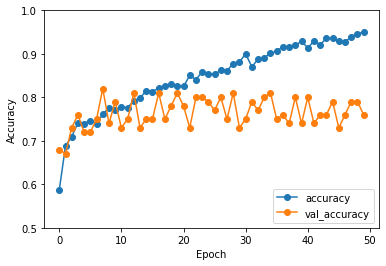

In [8]:
## model with data_generator 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
history = model.fit(train_generator, epochs=50,validation_data=validation_generator)
##
#test_loss, test_acc = model.evaluate(X_test, y_test)
#print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
test_generator = test_datagen.flow_from_directory(
        test_img_Path,
        target_size=(224, 224),
        batch_size=32,
        class_mode = 'binary',
    shuffle = 'False'
        )
test_loss, test_acc = model.evaluate(test_generator)
print("Test image accuracy :{}".format(test_acc))

Found 300 images belonging to 2 classes.
10/10 [==============================] - 4s 377ms/step - loss: 0.7790 - accuracy: 0.7667
Test image accuracy :0.7666666507720947


In [ ]:
##  Add dropout rate for regularization
for d in [0.1,0.2,0.3,0.4,0.5]:
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(d),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
    history = model.fit(train_generator, epochs=50,validation_data=validation_generator)
    ##
    test_loss, test_acc = model.evaluate(test_generator)
    print("Test image accuracy :{}".format(test_acc))
    ##
    plt.figure()
    plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
    plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.title("Drop out rate : " + str(d))

Epoch 1/50
80/80 [==============================] - 146s 2s/step - loss: 12.8651 - accuracy: 0.5231 - val_loss: 0.5434 - val_accuracy: 0.7000
Epoch 2/50
80/80 [==============================] - 145s 2s/step - loss: 0.5498 - accuracy: 0.7254 - val_loss: 0.4757 - val_accuracy: 0.7700
Epoch 4/50
80/80 [==============================] - 147s 2s/step - loss: 0.5281 - accuracy: 0.7431 - val_loss: 0.4732 - val_accuracy: 0.7400
Epoch 5/50
80/80 [==============================] - 145s 2s/step - loss: 0.5156 - accuracy: 0.7486 - val_loss: 0.4445 - val_accuracy: 0.7800
Epoch 6/50
80/80 [==============================] - 147s 2s/step - loss: 0.5075 - accuracy: 0.7509 - val_loss: 0.4998 - val_accuracy: 0.7800
Epoch 7/50
80/80 [==============================] - 146s 2s/step - loss: 0.5219 - accuracy: 0.7429 - val_loss: 0.4418 - val_accuracy: 0.7600
Epoch 8/50
80/80 [==============================] - 146s 2s/step - loss: 0.4921 - accuracy: 0.7573 - val_loss: 0.4172 - val_accuracy: 0.8300
Epoch 9/50
8

Due to Kaggle RAM limitations, the run of the code above couldn't be completed.  